In [113]:
#Loading the Data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Reading The CSV
data=pd.read_csv('crime.csv',engine='python')

Pre Processing The Data to Generate Decision Trees

In [114]:
data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [250]:
data['SHOOTING']=data['SHOOTING'].fillna(0)
data['SHOOTING']=data['SHOOTING'].map({0: 0,'Y':1})

data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  93
STREET                     0
Lat                    20632
Long                   20632
Location                   0
dtype: int64

In [251]:
#Drop All Null Values
datanew= data.dropna()
datanew.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [252]:
datanew['NightTime'] = 0


C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [253]:
datanew['NightTime'].loc[(datanew['HOUR'] >= 20)] = 1
datanew['NightTime'].loc[(datanew['HOUR'] <= 5)] = 1
datanew.head()

C:\Users\akrit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,10,439,0,2018-10-03 20:13:00,2018,10,6,20,Part Two,240,42.262608,-71.121186,"(42.26260773, -71.12118637)",1
1,I182080053,3201,Property Lost,PROPERTY - LOST,7,770,0,2018-08-30 20:00:00,2018,8,4,20,Part Three,143,42.352111,-71.135311,"(42.35211146, -71.13531147)",1
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,3,256,0,2018-10-03 19:20:00,2018,10,6,19,Part Two,1273,42.308126,-71.076930,"(42.30812619, -71.07692974)",0
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,0,835,0,2018-10-03 20:00:00,2018,10,6,20,Part One,728,42.359454,-71.059648,"(42.35945371, -71.05964817)",1
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,2,290,0,2018-10-03 20:49:00,2018,10,6,20,Part Three,3408,42.375258,-71.024663,"(42.37525782, -71.02466343)",1


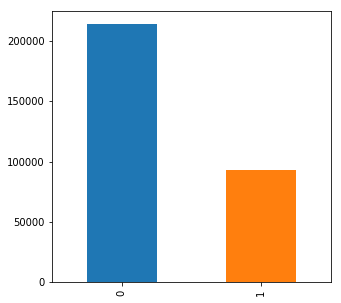

In [254]:
plt.figure(figsize=(5,5))
datanew['NightTime'].value_counts().plot.bar()
plt.show()

In [255]:
datanew['OFFENSE_CODE_GROUP'].value_counts().head(10)

#Analysing The Top Ten Offense Groups

Motor Vehicle Accident Response    31874
Larceny                            25900
Medical Assistance                 23158
Investigate Person                 18471
Other                              17615
Simple Assault                     15356
Vandalism                          15292
Drug Violation                     15081
Verbal Disputes                    13338
Towed                              11120
Name: OFFENSE_CODE_GROUP, dtype: int64

In [274]:
OFFENSE_CODE_GROUP_SELECTED = ('Motor Vehicle Accident Response','Larceny','Medical Assistance','Investigate Person','Other', 
            'Drug Violation'
                               , 'Simple Assault', 'Vandalism', 'Verbal Disputes', 'Towed'
                              )

In [275]:
processedData = pd.DataFrame()
k = 0
while k<len(OFFENSE_CODE_GROUP_SELECTED):
    processedData = processedData.append(datanew.loc[datanew['OFFENSE_CODE_GROUP']==OFFENSE_CODE_GROUP_SELECTED[k]])
    k = k+1
processedData.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,4,0,0,2018-10-03 20:16:00,2018,10,6,20,Part Three,3166,42.320734,-71.056764,"(42.32073413, -71.05676415)",1
10,I182080043,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,10,691,0,2018-10-03 19:33:00,2018,10,6,19,Part Three,594,42.344323,-71.157784,"(42.34432328, -71.15778368)",0
15,I182080038,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,4,0,0,2018-10-03 19:30:00,2018,10,6,19,Part Three,3166,42.315961,-71.090426,"(42.31596119, -71.09042564)",0
20,I182080030,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,9,58,0,2018-10-02 20:00:00,2018,10,5,20,Part Three,3,42.330015,-71.038513,"(42.33001489, -71.03851306)",1
68,I182079979,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,8,83,0,2018-10-03 15:13:00,2018,10,6,15,Part Three,265,42.310910,-71.057674,"(42.31091044, -71.05767414)",0


In [276]:
transform_labels=processedData.iloc[:,:]
transform_labels.loc[:,'STREET']=LabelEncoder().fit_transform(transform_labels.loc[:,'STREET'].astype('str'))
transform_labels.loc[:,'DISTRICT']=LabelEncoder().fit_transform(transform_labels.loc[:,'DISTRICT'].astype('str'))
transform_labels.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(transform_labels.loc[:,'REPORTING_AREA'].astype('str'))
transform_labels.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(transform_labels.loc[:,'DAY_OF_WEEK'])
#transform_labels.loc[:,'OFFENSE_CODE_GROUP']=LabelEncoder().fit_transform(transform_labels.loc[:,'DISTRICT'].astype('str'))

transform_labels.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,7,0,0,2018-10-03 20:16:00,2018,10,6,20,Part Three,2409,42.320734,-71.056764,"(42.32073413, -71.05676415)",1
10,I182080043,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,2,658,0,2018-10-03 19:33:00,2018,10,6,19,Part Three,3178,42.344323,-71.157784,"(42.34432328, -71.15778368)",0
15,I182080038,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,7,0,0,2018-10-03 19:30:00,2018,10,6,19,Part Three,2409,42.315961,-71.090426,"(42.31596119, -71.09042564)",0
20,I182080030,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,12,534,0,2018-10-02 20:00:00,2018,10,5,20,Part Three,2223,42.330015,-71.038513,"(42.33001489, -71.03851306)",1
68,I182079979,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,11,812,0,2018-10-03 15:13:00,2018,10,6,15,Part Three,1835,42.310910,-71.057674,"(42.31091044, -71.05767414)",0


# DecisionTreeClassifier 

In [277]:
from sklearn.model_selection import train_test_split
datanew= transform_labels.dropna()
train_data, test_data= train_test_split(datanew, random_state=0, test_size=0.05)

print(len(train_data))
print(len(test_data))


125494
6605


In [278]:
train_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
61343,I182014509,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",2,713,0,2018-02-24 10:36:00,2018,2,2,10,Part Two,668,42.343624,-71.142684,"(42.34362416, -71.14268401)",0
219402,I162059589,3115,Investigate Person,INVESTIGATE PERSON,0,126,0,2016-07-25 23:00:00,2016,7,1,23,Part Three,1681,42.358911,-71.157651,"(42.35891094, -71.15765076)",1
71050,I182004200,1810,Drug Violation,DRUGS - SALE / MANUFACTURING,0,697,0,2018-01-16 16:00:00,2018,1,5,16,Part Two,561,42.361596,-71.056925,"(42.36159585, -71.05692518)",0
128668,I172050512,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,11,142,0,2017-06-23 16:30:00,2017,6,0,16,Part Three,2021,42.297459,-71.051028,"(42.29745944, -71.05102780)",0
181160,I162100719,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,10,233,0,2016-12-10 12:55:00,2016,12,2,12,Part Three,1778,42.288812,-71.085132,"(42.28881222, -71.08513152)",0


In [279]:
from sklearn import tree

features_train = train_data[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long']]
target_train = train_data[['OFFENSE_CODE_GROUP']]
features_test = test_data[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long']]
target_test = test_data[['OFFENSE_CODE_GROUP']]

#Creating Our classifier By Providing Training Data
clf = tree.DecisionTreeClassifier()

clf = clf.fit(features_train, target_train)

In [280]:
#Predicting for the test set using the classifier created above
target_pred = clf.predict(features_test)
target_pred

array(['Larceny', 'Drug Violation', 'Larceny', ..., 'Drug Violation',
       'Motor Vehicle Accident Response', 'Other'], dtype=object)

In [281]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

                                 precision    recall  f1-score   support

                 Drug Violation       0.50      0.58      0.54       794
             Investigate Person       0.20      0.18      0.19       948
                        Larceny       0.40      0.40      0.40      1249
             Medical Assistance       0.26      0.25      0.26      1153
Motor Vehicle Accident Response       0.36      0.36      0.36      1543
                          Other       0.20      0.20      0.20       918

                      micro avg       0.33      0.33      0.33      6605
                      macro avg       0.32      0.33      0.32      6605
                   weighted avg       0.32      0.33      0.32      6605



In [282]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

0.3259651778955337

In [283]:
# 2. The precision and recall values

# Calculate Precision Value

from sklearn import metrics

metrics.precision_score(target_test, target_pred, average='micro')


0.3259651778955337

In [284]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(target_test, target_pred, average='micro')


0.3259651778955337

In [285]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_test, target_pred, average='micro')

(0.3259651778955337, 0.3259651778955337, 0.3259651778955337, None)

# ExtraTreeClassifier

In [301]:
#Creating Our classifier By Providing Training Data
clf2 = tree.ExtraTreeClassifier()

clf2 = clf2.fit(features_train, target_train)

In [302]:
#Predicting for the test set using the classifier created above
target_pred = clf2.predict(features_test)
target_pred

array(['Larceny', 'Drug Violation', 'Medical Assistance', ...,
       'Drug Violation', 'Motor Vehicle Accident Response', 'Other'],
      dtype=object)

In [303]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

                                 precision    recall  f1-score   support

                 Drug Violation       0.51      0.56      0.53       794
             Investigate Person       0.19      0.17      0.18       948
                        Larceny       0.37      0.39      0.38      1249
             Medical Assistance       0.25      0.26      0.25      1153
Motor Vehicle Accident Response       0.35      0.34      0.35      1543
                          Other       0.19      0.18      0.19       918

                      micro avg       0.32      0.32      0.32      6605
                      macro avg       0.31      0.32      0.31      6605
                   weighted avg       0.31      0.32      0.31      6605



In [304]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

0.3152157456472369

In [305]:
# 2. The precision and recall values

# Calculate Precision Value

from sklearn import metrics

metrics.precision_score(target_test, target_pred, average='micro')


0.3152157456472369

In [306]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(target_test, target_pred, average='micro')


0.3152157456472369

In [307]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_test, target_pred, average='micro')

(0.3152157456472369, 0.3152157456472369, 0.3152157456472369, None)

# KNN

In [308]:
from sklearn.neighbors import KNeighborsClassifier

#Creating Our classifier By Providing Training Data
clf3 = KNeighborsClassifier()

clf3 = clf3.fit(features_train, target_train)

C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [309]:
#Predicting for the test set using the classifier created above
target_pred = clf2.predict(features_test)
target_pred

array(['Larceny', 'Drug Violation', 'Medical Assistance', ...,
       'Drug Violation', 'Motor Vehicle Accident Response', 'Other'],
      dtype=object)

In [310]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

                                 precision    recall  f1-score   support

                 Drug Violation       0.51      0.56      0.53       794
             Investigate Person       0.19      0.17      0.18       948
                        Larceny       0.37      0.39      0.38      1249
             Medical Assistance       0.25      0.26      0.25      1153
Motor Vehicle Accident Response       0.35      0.34      0.35      1543
                          Other       0.19      0.18      0.19       918

                      micro avg       0.32      0.32      0.32      6605
                      macro avg       0.31      0.32      0.31      6605
                   weighted avg       0.31      0.32      0.31      6605



In [311]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

0.3152157456472369

In [312]:
# 2. The precision and recall values

# Calculate Precision Value

from sklearn import metrics

metrics.precision_score(target_test, target_pred, average='micro')


0.3152157456472369

In [313]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(target_test, target_pred, average='micro')


0.3152157456472369

In [314]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_test, target_pred, average='micro')

(0.3152157456472369, 0.3152157456472369, 0.3152157456472369, None)

# Rainforest

In [315]:
from sklearn.ensemble import RandomForestClassifier

#Creating Our classifier By Providing Training Data
clf4 = RandomForestClassifier()

clf4 = clf4.fit(features_train, target_train)

C:\Users\akrit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [316]:
#Predicting for the test set using the classifier created above
target_pred = clf2.predict(features_test)
target_pred

array(['Larceny', 'Drug Violation', 'Medical Assistance', ...,
       'Drug Violation', 'Motor Vehicle Accident Response', 'Other'],
      dtype=object)

In [317]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

                                 precision    recall  f1-score   support

                 Drug Violation       0.51      0.56      0.53       794
             Investigate Person       0.19      0.17      0.18       948
                        Larceny       0.37      0.39      0.38      1249
             Medical Assistance       0.25      0.26      0.25      1153
Motor Vehicle Accident Response       0.35      0.34      0.35      1543
                          Other       0.19      0.18      0.19       918

                      micro avg       0.32      0.32      0.32      6605
                      macro avg       0.31      0.32      0.31      6605
                   weighted avg       0.31      0.32      0.31      6605



In [318]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

0.3152157456472369

In [319]:
# 2. The precision and recall values

# Calculate Precision Value

from sklearn import metrics

metrics.precision_score(target_test, target_pred, average='micro')


0.3152157456472369

In [328]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(target_test, target_pred, average='micro')


0.3152157456472369

In [330]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_test, target_pred, average='micro')

(0.3152157456472369, 0.3152157456472369, 0.3152157456472369, None)

In [334]:
from sklearn.metrics import f1_score

f1_score(target_test, target_pred, average='micro')
 

0.3152157456472369